In [1]:
import gzip
import zipfile
import json
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import pandas as pd
import string
import random
import string
from sklearn import linear_model
import matplotlib.pyplot as plt
path = "C://niha//cse158//data"

In [2]:
import json
 
filter_path = path+'//filter_all_t.json'
 
# Open and read the entire content of the JSON file
with open(filter_path, 'r') as json_file:
    filter_data_single_line = json_file.read()
 
# Parse the JSON data
try:
    json_filter_data = json.loads(filter_data_single_line)
    # Now you can work with the parsed JSON data
    print(json_filter_data)
except json.JSONDecodeError as err:
    print(f'Error decoding JSON: {err}')
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
imagerev_path = path+'//image_review_all.json'
#with open(imagerev_path, 'r') as json_file:
#    for line_number, line in enumerate(json_file,1):
#        try:
#            imagerev_data = json.loads(line)
#            print(imagerev_data)
#        except json.JSONDecodeError as err:
#            print(f'Error decoding JSON: {err}')

In [4]:
def getjson2(fname, maxno=-1):
    data_list = list()
    no = 0
    with open(fname, 'r') as json_file:
        for line_number, line in enumerate(json_file,1):
            try:
                imagerev_data = json.loads(line)
                data_list.append(imagerev_data)
                no += 1
                if (maxno > -1) & (no >= maxno):
                    break
            except json.JSONDecodeError as err:
                print(f'Error decoding JSON: {err}')
        return data_list

In [5]:
imagerev_data = getjson2(imagerev_path)

In [6]:
json_filter_data = getjson2(filter_path)

In [7]:
filter_df = pd.DataFrame(json_filter_data)
imagerev_df = pd.DataFrame(imagerev_data)

In [8]:
imagerev_df

,business_id,user_id,rating,review_text,pics
0,605730f68cd0e3d69a52284b,113890892872599852766,4,We came for a birthday brunch and this place i...,[{'id': 'AF1QipPrls2G30PS3tyC55KBxUrKgy3ER0AB5...
1,605730f68cd0e3d69a52284b,100158382312395993536,5,"Cool place to hang out, have drinks. There is...",[{'id': 'AF1QipPj8FEVZrdpTZmRdjoOtzQyfGYSwJ0Ub...
2,605730f68cd0e3d69a52284b,113495161718980109602,2,This place doesn’t rock the senses when it com...,[{'id': 'AF1QipOP5poDTRQ4XXIM11buv5x9Ae-BNXwcq...
3,605730f68cd0e3d69a52284b,111259544401075262963,3,Pretty cool place to hang out with friends and...,[{'id': 'AF1QipMq84NEaCMdQtfrELbudJdQbTILp_5I_...
4,605730f68cd0e3d69a52284b,104285463275063919410,5,We saw this place the other day when we had re...,[{'id': 'AF1QipOTCVzPHHWTiQO_2UZNVeG5KMbcki6d5...
...,...,...,...,...,...
1487742,60401a5466e8bd764351f091,107790040475008770577,5,Ordered the Chicken Tikka Masala and Chicken K...,[{'id': 'AF1QipPGxTrlMSpYMC5riNRB0lliBOkMdLHfU...
1487743,60401a5466e8bd764351f091,102318676431181796476,5,Great shrimp tikka masala. A little too much r...,[{'id': 'AF1QipOnpe7cvJ7vCYNBZVjZwCaY8JkxIhuIp...
1487744,60401a5466e8bd764351f091,115604769413521307669,4,"Good food, great portions. The chicken I order...",[{'id': 'AF1QipOiqyQLlrJZ1cDNHnedTBqNUcnH-x0Fo...
1487745,60401a5466e8bd764351f091,101315114581473619145,4,Amazing is really good you guys should try it ...,[{'id': 'AF1QipPgzFbzmglj8tIeIU71pFsWE4slxI2Ax...


## Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of 64527 businesses on 1487747 records')

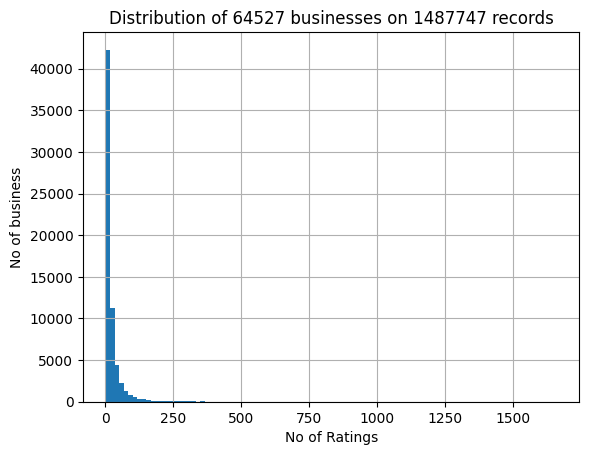

In [9]:
#rating_counts = imagerev_df.groupby("business_id").count()
#bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]  # Adjust bins as needed
#labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-1000']
#rating_counts['range'] = pd.cut(rating_counts, bins=bins, labels=labels, right=False)
#range_counts = rating_counts['range'].value_counts().sort_index()

#plt.figure(figsize = (10,6))
#range_counts.plot(kind='bar')
#plt.title('Distribution of Number of Ratings for Businesses')
#plt.xlabel('Number of Ratings Range')
#plt.ylabel('Frequency')
#plt.xticks(rotation=45)
#plt.show()
dfgrpbusinesscnt = imagerev_df.groupby('business_id').count()
dfgrpbusinesscnt['user_id'].hist(bins=100)
plt.xlabel('No of Ratings')
plt.ylabel('No of business')
plt.title(f'Distribution of {dfgrpbusinesscnt.shape[0]} businesses on {imagerev_df.shape[0]} records')

In [10]:
len(imagerev_df['user_id'].unique())

868937

<AxesSubplot: >

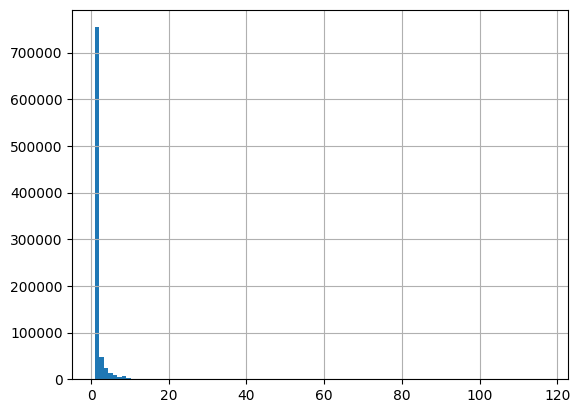

In [11]:
dfgrpusercnt = imagerev_df.groupby('user_id').count()
dfgrpusercnt['business_id'].hist(bins=100)

In [12]:
dfgrpratingcnt = imagerev_df.groupby('rating').count()
dfgrpratingcnt

,business_id,user_id,review_text,pics
rating,,,,
1,58645,58645,58645,58645
2,38009,38009,38009,38009
3,88533,88533,88533,88533
4,289106,289106,289106,289106
5,1013454,1013454,1013454,1013454


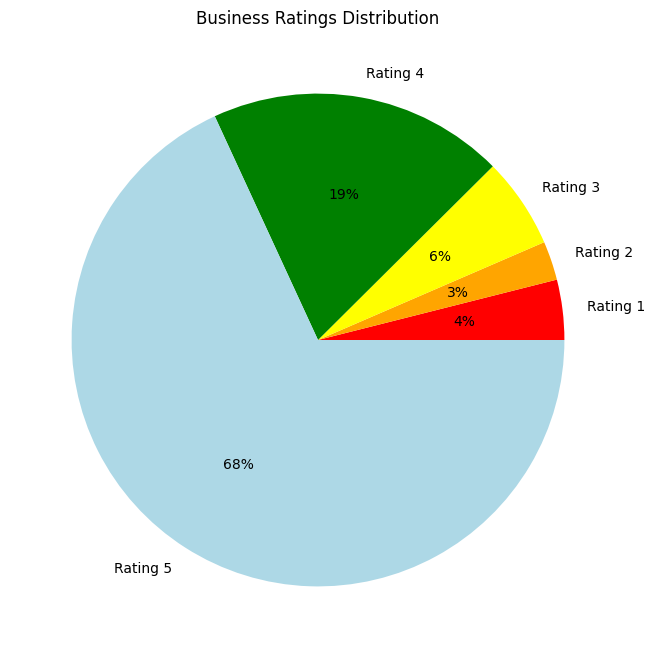

In [13]:
import matplotlib.pyplot as plt

ratings = list(dfgrpratingcnt['user_id'])
labels = ['Rating '+str(i)  for i in dfgrpratingcnt.index]
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(ratings, labels=labels, autopct='%1.0f%%', startangle=0, \
        colors=['red', 'orange', 'yellow', 'green', 'lightblue'])
plt.title('Business Ratings Distribution')
plt.show()

In [14]:
dfgrpuser=imagerev_df.groupby('user_id')
cmcnt = 100
topusrcnt = cmcnt
topbuscnt = cmcnt

topusr = dfgrpusercnt['business_id'].\
            sort_values(ascending=False)[0:topusrcnt].index

topusr[0:10]


topbus = dfgrpbusinesscnt['user_id'].\
            sort_values(ascending=False)[0:topbuscnt].index

In [15]:
rdatal = list()
for u in topusr:
    bdatal = list()
    grp = dfgrpuser.get_group(u)[['business_id', 'rating']]
    grp = dict(zip(grp['business_id'], grp['rating']))
    for b in topbus:
        #print(b, b in grp.index)
        if b in grp:
            #print(f'putting val {grp[b]=}')
            bdatal.append(grp[b])
        else:
            bdatal.append(0)
    rdatal.append(bdatal)


Text(0.5, 1.0, 'User-Business Ratings Heatmap')

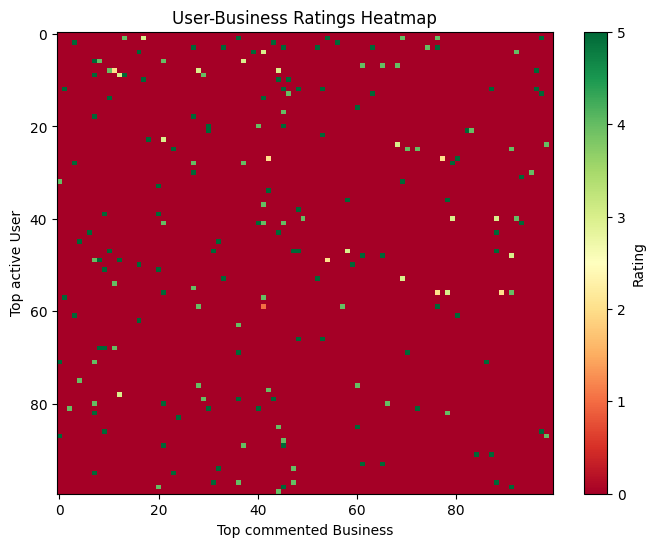

In [16]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
# Sample data: user-business ratings
# Replace this with your actual data
ratings_data = np.array(rdatal)

plt.imshow(ratings_data, cmap=plt.cm.RdYlGn, interpolation='nearest',\
           aspect='auto', vmin=0, vmax=5)
cbar = plt.colorbar(ticks=np.arange(0, 6), label='Rating')
plt.xlabel('Top commented Business')
plt.ylabel('Top active User')
plt.title('User-Business Ratings Heatmap')

In [17]:
dfgrpuser=imagerev_df.groupby('user_id')

In [18]:
topusrcnt = 10
topusr = dfgrpusercnt['business_id'].\
            sort_values(ascending=False)[0:topusrcnt].index

In [19]:
topusr

Index(['100060262004832056023', '114607904590486797636',
       '116396021024611789723', '113090154661790710275',
       '111237841947380337726', '104819208193648646391',
       '113060025517917819155', '108972208682479297190',
       '100003947933664632255', '117495693473911053786'],
      dtype='object', name='user_id')

## Splitting Data Into Validation

In [20]:
valpc = .05
testpc = .1
trainpc = 1 - testpc - valpc

In [21]:
def splitdf(df):
    traindf = df.iloc[:int(trainpc*df.shape[0]), :]
    valdf = df.iloc[int(trainpc*df.shape[0]):int((valpc+trainpc)*df.shape[0]), :]
    testdf = df.iloc[int((valpc+trainpc)*df.shape[0]):, :]
    print(f'{traindf.shape, valdf.shape, testdf.shape}')
    return traindf, valdf, testdf
traindf, valdf, testdf = splitdf(imagerev_df)

((1264584, 5), (74388, 5), (148775, 5))


In [22]:
def splitlist(l):
    nl = len(l)
    trainl = l[:int(trainpc*nl)]
    vall =   l[int(trainpc*nl):int((valpc+trainpc)*nl)]
    testl =  l[int((valpc+trainpc)*nl):]
    return trainl, vall, testl

## Prediction of Rating on Review Comments

In [23]:
def gettf(str,  tf=0, islower=True, ispunc = True, isadd=True, punc=0):
    lwr = lambda x : x.lower()
    if islower == False:
        lwr = lambda x: x
    thistf = {}
    if(tf == 0):
        tf = defaultdict(int)
    frmtstr =''
    if ispunc == True:
        if punc == 0:
            punc = set(string.punctuation)
        frmtstr = ''.join([lwr(c) for c in str if not lwr(c) in punc])
    else:
        frmtstr = ''.join([lwr(c) for c in str])
    for w in frmtstr.split():
        if isadd == True:
            tf[w] += 1
        else:
            if w not in thistf:
                tf[w] += 1
                thistf[w]=1
    return tf

In [24]:
# creating design matrix
def feature(datum, words, wordId, isVector=True, tolower=True, removePunct=True):
    feat = [0]*len(words)
    r = datum#['text']
    # get lcl tf for this
    lcltf = gettf(r, 0, True, True, True)
    if tolower:
        r = r.lower()
    if removePunct:
        r = ''.join([c for c in r if c not in punc])
    for w in r.split():
        if w in words:
            if isVector == False:
                feat[wordId[w]] += idf[w]*lcltf[w]
            else:
                feat[wordId[w]] = idf[w]*lcltf[w]
    # if vector then not intended to be used in X matrix.but for cosine similarity
    if isVector == False:
        feat.append(1) # offset
    return feat

In [25]:
traindf.head(1)

,business_id,user_id,rating,review_text,pics
0,605730f68cd0e3d69a52284b,113890892872599852766,4,We came for a birthday brunch and this place i...,[{'id': 'AF1QipPrls2G30PS3tyC55KBxUrKgy3ER0AB5...


In [26]:
#getting most frequent words
trtf = defaultdict(int)
punc = string.punctuation
imagerev_df['review_text'].apply(lambda x : gettf(x, \
                            trtf, islower=True, \
                                ispunc = True, isadd=True,
                                              punc=punc))


0          {'we': 495272, 'came': 77607, 'for': 684125, '...
1          {'we': 495272, 'came': 77607, 'for': 684125, '...
2          {'we': 495272, 'came': 77607, 'for': 684125, '...
3          {'we': 495272, 'came': 77607, 'for': 684125, '...
4          {'we': 495272, 'came': 77607, 'for': 684125, '...
                                 ...                        
1487742    {'we': 495272, 'came': 77607, 'for': 684125, '...
1487743    {'we': 495272, 'came': 77607, 'for': 684125, '...
1487744    {'we': 495272, 'came': 77607, 'for': 684125, '...
1487745    {'we': 495272, 'came': 77607, 'for': 684125, '...
1487746    {'we': 495272, 'came': 77607, 'for': 684125, '...
Name: review_text, Length: 1487747, dtype: object

In [27]:
# sorting
swcntset = [(trtf[i], i) for i in trtf]
swcntset.sort(reverse=True)
swcnt = [i[1] for i in swcntset]
swcntset[0:10]

[(3192238, 'the'),
 (2310408, 'and'),
 (1426353, 'a'),
 (1360067, 'was'),
 (1137811, 'to'),
 (1102291, 'i'),
 (847034, 'is'),
 (804105, 'food'),
 (764767, 'of'),
 (713918, 'it')]

In [28]:
def getidf(iter, fn, issorted=False, islog10=True, islower=True, ispunc=True, punc=0):
    idx = 0
    df = defaultdict(int)
    for x in iter:
        x = fn(x)
        idx += 1
        #print(f'{idx=} : {x}')
        gettf(x, df, islower, ispunc, isadd=False, punc=punc)
    print(f'total entries:{idx}')
    oplst = []
    for k in df.keys():
        if islog10 == True:
            logfn = math.log10
        else:
            logfn = math.log2
        df[k] = logfn(idx/df[k])
        if issorted == True:
            #print(df[k], k)
            oplst.append((df[k], k))
    # if sorted
    if (issorted == True):
        oplst.sort(reverse=True)
    return df, oplst

# get idf for words
idf, oplst = getidf(imagerev_df['review_text'], lambda x: x)

total entries:1487747


In [29]:
# First N common words
nw = 300
words = [i[1] for i in swcntset[0:nw]]
wordId = dict(zip(words, range(len(words))))

In [30]:
X = list(imagerev_df['review_text'].apply(lambda x : feature(x, words, wordId)))

In [31]:
Y = list(imagerev_df['rating'])

In [32]:
Xtrain, Xval, Xtest = splitlist(X)
Ytrain, Yval, Ytest = splitlist(Y)

In [33]:
def getModAccuracy(c, Xtrain, Ytrain, Xval, Yval):
    mod = linear_model.LogisticRegression(C=c)
    modop=mod.fit(Xtrain, Ytrain)
    yval = mod.predict(Xval)
    correct = yval == Yval
    accuracy = sum(correct)/len(correct)
    print(f'{c, accuracy=}')
    return mod, accuracy
cList = [1, 2, 5, 6, 0.5, 7, .25]
accList = list()
for c in cList:
    mod, acc = getModAccuracy(c, Xtrain, Ytrain, Xval, Yval)
    accList.append((acc, c, mod))

C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(1, 0.7356697316771522)


C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(2, 0.7357772759047159)


C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(5, 0.735871377103834)


C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(6, 0.7358176049900521)


C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(0.5, 0.7357100607624886)


C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(7, 0.735844491046943)


C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(0.25, 0.7357638328762703)


In [34]:
accList.sort(reverse=True)
accList

[(0.735871377103834, 5, LogisticRegression(C=5)),
 (0.735844491046943, 7, LogisticRegression(C=7)),
 (0.7358176049900521, 6, LogisticRegression(C=6)),
 (0.7357772759047159, 2, LogisticRegression(C=2)),
 (0.7357638328762703, 0.25, LogisticRegression(C=0.25)),
 (0.7357100607624886, 0.5, LogisticRegression(C=0.5)),
 (0.7356697316771522, 1, LogisticRegression(C=1))]

In [35]:
c=accList[0][1]
print(f'{c=}')
mod, acc = getModAccuracy(c, Xtrain, Ytrain, Xtest, Ytest)
acc

c=5


C:\Users\mail2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c, accuracy=(5, 0.7329994958830449)


0.7329994958830449